In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns

In [3]:
seed = 111
np.random.seed(seed)
sns.set(style="white")

color_names = ["red",
               "windows blue",
               "amber",
               "faded green",
               "dusty purple",
               "orange",
               "clay",
               "pink",
               "greyish",
               "light cyan",
               "steel blue",
               "pastel purple",
               "mint",
               "salmon"]

colors = sns.xkcd_palette(color_names)

In [4]:
def _plot_segments(ax, segmentation, ymin, ymax):
    s_seq = np.squeeze(segmentation)
    z_cps = np.concatenate(
        ([0], np.where(np.diff(s_seq))[0]+1, [s_seq.size]))
    for start, stop in zip(z_cps[:-1], z_cps[1:]):
        stop = min(s_seq.size, stop+1)
        ax.axvspan(
            start, stop-1, ymin=ymin, ymax=ymax,
            alpha=.8, facecolor=colors[s_seq[start]])

In [6]:
def make_seq(h=10, T=100):
    y = np.random.randint(h)
    seq = []
    z_seq = []
    v = np.random.uniform(-0.5, 0.5)
    for i in range(T):
        z_seq.append(0 if v < 0 else 1)
        seq.append(y + np.random.randn(1) * 0.1)
        y += v
        if y > h:
            v = -v
        elif y < 0:
            v = -v
    return np.array(seq), np.array(z_seq)

In [140]:
def make_seq_noise(h=10, T=100):
    y = np.random.randint(h)
    seq = []
    z_seq = []
    direction = np.random.choice([-1, 1])
    v = np.random.uniform(0.3, 0.5)
    for i in range(T):
        z_seq.append(0 if direction < 0 else 1)
        seq.append(y + np.random.randn(1) * 0.1)
        # add noise to dynamics
        delta =  direction * np.max([v + np.random.randn(1) * 0.1, 0.1])
        y += delta
        if y > h or y < 0:
            direction = -direction
            y = np.clip(y,0, h )
    return np.array(seq), np.array(z_seq)

Segment lengths: [13, 23, 25, 24, 15]
Number of segments: 5
Average segment length: 20.0


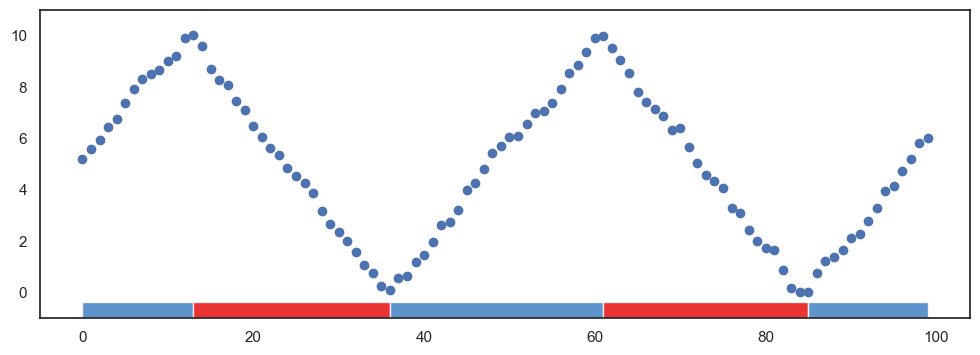

In [145]:
def calculate_segment_lengths(z_seq):

    lengths = []
    current_length = 1
    
    for i in range(1, len(z_seq)):
        if z_seq[i] == z_seq[i-1]:
            current_length += 1
        else:
            
            lengths.append(current_length)
            current_length = 1
    
    # Append the last segment length
    lengths.append(current_length)
    
    return lengths

# Example usage:
y_seq, z_seq = make_seq_noise()
segment_lengths = calculate_segment_lengths(z_seq)
print("Segment lengths:", segment_lengths)
print("Number of segments:", len(segment_lengths))
print("Average segment length:", np.mean(segment_lengths))
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(100), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

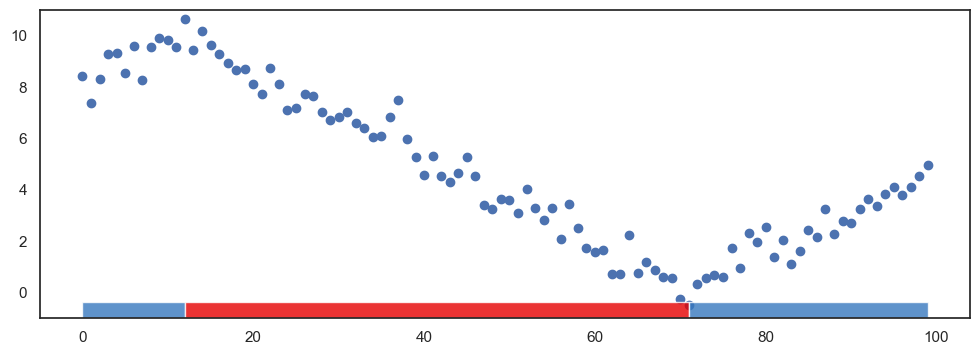

In [60]:
y_seq, z_seq = make_seq()
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(100), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

In [151]:
data_y = []
data_z = []
for i in tqdm(range(100000)):
    dy, dz = make_seq()
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

100%|██████████| 100000/100000 [00:33<00:00, 3020.81it/s]


((100000, 100, 1), (100000, 100))

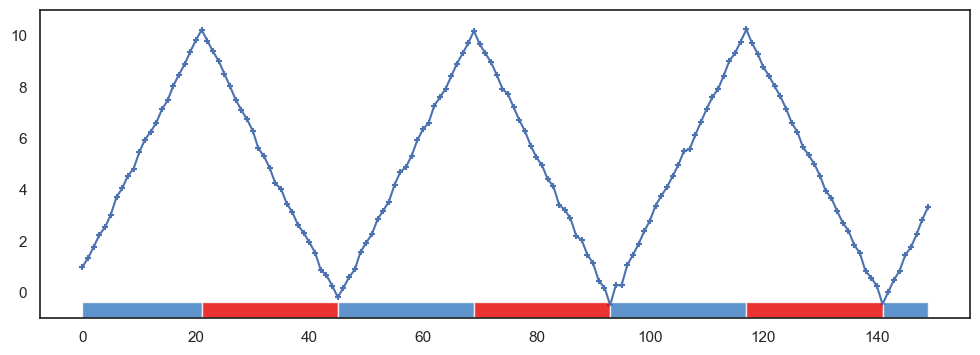

In [167]:
idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(150), y_seq, s=25, marker='+')
ax.plot(np.arange(150), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

In [153]:
np.savez('bouncing_ball.npz', y=data_y, z=data_z)

In [7]:
data_y = []
data_z = []
for i in tqdm(range(3000)):
    dy, dz = make_seq(T=150)
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [00:01<00:00, 2005.74it/s]


((3000, 150, 1), (3000, 150))

In [8]:
np.savez('bouncing_ball_calibration.npz', y=data_y, z=data_z)

## generate noisy versions

In [168]:
data_y = []
data_z = []
for i in tqdm(range(100000)):
    dy, dz = make_seq_noise()
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

  0%|          | 0/100000 [00:00<?, ?it/s]

/usr/local/Caskroom/miniforge/base/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
100%|██████████| 100000/100000 [03:21<00:00, 496.41it/s]


((100000, 100, 1), (100000, 100))

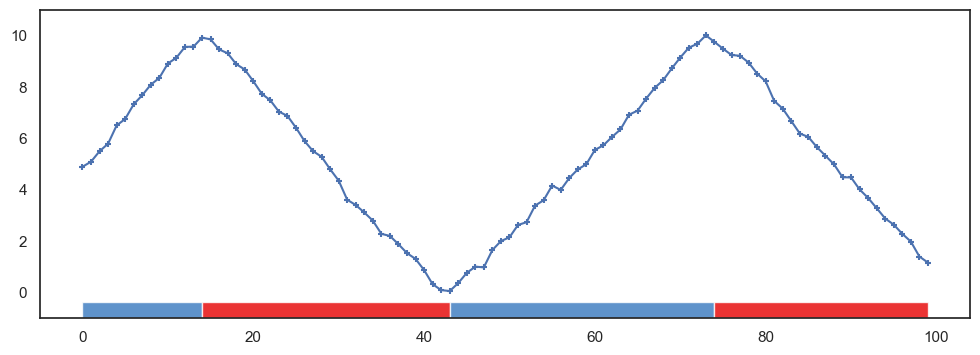

In [170]:
idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(100), y_seq, s=25, marker='+')
ax.plot(np.arange(100), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

In [171]:
np.savez('bouncing_ball_noisy.npz', y=data_y, z=data_z)

In [174]:
# 3000 for calibration, 1000 for test
data_y = []
data_z = []
for i in tqdm(range(3000)):
    dy, dz = make_seq_noise(T=150)
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

100%|██████████| 3000/3000 [00:09<00:00, 323.10it/s]


((3000, 150, 1), (3000, 150))

In [175]:
np.savez('bouncing_ball_noisy_calibration.npz', y=data_y, z=data_z)

In [ ]:
data_y = []
data_z = []
for i in tqdm(range(1000)):
    dy, dz = make_seq_noise(T=150)
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape